<a href="https://colab.research.google.com/github/shliakhtas/ASCM/blob/main/stravaparser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import io
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import requests 
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

target_folder = './drive/My Drive/strava_images'
if not os.path.exists(target_folder):
  os.makedirs(target_folder)
  

Mounted at /content/drive


In [ ]:
## Set up the cookies, image URL and filename
cookies = {'_dc_gtm_UA-6309847-24':	"1",
           '_ga':	"GA1.2.1768783673.1601295337",
           '_gat_UA-6309847-24':	"1",
           '_gid':	"GA1.2.1418838620.1603550866",
           '_strava4_session'	:"m1gr2lrb98pqg4ru2hp84um9l75u6os",
           'ajs_anonymous_id'	:"\"e662f558-5aff-4c0b-9d7a-411577bdb60b\"",
           'ajs_user_id':	"33570430",
           'CloudFront-Key-Pair-Id':	"APKAIDPUN4QMG7VUQPSA",
           'CloudFront-Policy':	"eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6Imh0dHBzOi8vaGVhdG1hcC1leHRlcm5hbC0qLnN0cmF2YS5jb20vKiIsIkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTYwNDQxNTA5Mn0sIkRhdGVHcmVhdGVyVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNjAzMTkxMDkyfX19XX0_",
           'CloudFront-Signature'	:"HV4HKgRQkwovJpN0mZzjywri-0wJjEX9sS-dVEVsR5kPrIenJkHHg0c9DDGH7P5Sia~MmE44M~DAxGeGOvhedIKc6PnuwRAwoHa-bkCgwVAl1DAuaWHIVYM9l9gozwCTfJTdlZPjMiZGjxrnGOWCTYc046MpfWRAu0glXm5x6F7Zy2mWwYm94bGD6H4ifrW3z79ZmvdOa~Z~siZA0DDz002KLqljluqQvAW10AB~eIXjthPGnq~TMV-Y2YD9QlYdu8VYTV~Uno~rgo6Ebct8esdp10OswpA7AdeiaKsGPiKCXZGdyTfxAwpqT-Q7JTklcNCTBELD--i199vInkDDAw__",
           'sp'	:"13645f10-5d73-499a-bd1c-202ec4c6bd9a"
}


In [ ]:
def scrapimg(image_url, filename):
  # Open the url image, set stream to True, this will return the stream content.
  r = requests.get(image_url, stream = True, cookies=cookies)
  print(r)
  # Check if the image was retrieved successfully
  if r.status_code == 200:
      # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
      r.raw.decode_content = True
      
      # Open a local file with wb ( write binary ) permission.
      with open(filename,'wb') as f:
          shutil.copyfileobj(r.raw, f)
          
      print('Image sucessfully Downloaded: ',filename)
  else:
      print('Image Couldn\'t be retreived')

In [ ]:
first = ['11136.png', [26.74678, 64.18262], [26.75905, 64.18262], [26.75905, 64.17050], [26.74678, 64.17050]]
delta = 0.012227
m = [18572,11136]
def createdata(file, n):
  i = [n[0]-m[0], n[1]-m[1]]
  second = [file, [first[1][0]+i[0]*delta, first[1][1]+i[1]*delta], [first[2][0]+i[0]*delta, first[2][1]+i[1]*delta], [first[3][0]+i[0]*delta, first[3][1]+i[1]*delta], [first[4][0]+i[0]*delta, first[4][0]+i[1]*delta]]
  return second

In [ ]:
df = pd.DataFrame(columns=['file', 'A', 'B', 'C', 'D'])
arr = [[18572,11136]]
for a in range(10):
  newelem1 = [arr[0][0]+a, arr[0][1]]
  newelem2 = [arr[0][0], arr[0][1]+a]
  arr.append(newelem1)
  arr.append(newelem2)
for i in arr:
  filename = str(i[0])+'-'+str(i[1])+".png"
  image_url = "https://heatmap-external-a.strava.com/tiles-auth/all/hot/15/"+str(i[0])+'/'+str(i[1])+".png?v=19"
  data = createdata(filename, i) 
  df.loc[filename] = data
  scrapimg(image_url, filename)

<Response [200]>
Image sucessfully Downloaded:  18572-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11136.png
<Response [200]>
Image sucessfully Downloaded:  18573-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11137.png
<Response [200]>
Image sucessfully Downloaded:  18574-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11138.png
<Response [200]>
Image sucessfully Downloaded:  18575-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11139.png
<Response [200]>
Image sucessfully Downloaded:  18576-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11140.png
<Response [200]>
Image sucessfully Downloaded:  18577-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11141.png
<Response [200]>
Image sucessfully Downloaded:  18578-11136.png
<Response [200]>
Image sucessfully Downloaded:  18572-11142.png
<Response [200]>
Image sucessfully Downl

In [ ]:
df

,file,A,B,C,D
18572-11136.png,18572-11136.png,"[26.74678, 64.18262]","[26.75905, 64.18262]","[26.75905, 64.1705]","[26.74678, 26.74678]"
18573-11136.png,18573-11136.png,"[26.759007, 64.18262]","[26.771276999999998, 64.18262]","[26.771276999999998, 64.1705]","[26.759007, 26.74678]"
18572-11137.png,18572-11137.png,"[26.74678, 64.194847]","[26.75905, 64.194847]","[26.75905, 64.182727]","[26.74678, 26.759007]"
18574-11136.png,18574-11136.png,"[26.771234, 64.18262]","[26.783503999999997, 64.18262]","[26.783503999999997, 64.1705]","[26.771234, 26.74678]"
18572-11138.png,18572-11138.png,"[26.74678, 64.207074]","[26.75905, 64.207074]","[26.75905, 64.19495400000001]","[26.74678, 26.771234]"
18575-11136.png,18575-11136.png,"[26.783461000000003, 64.18262]","[26.795731, 64.18262]","[26.795731, 64.1705]","[26.783461000000003, 26.74678]"
18572-11139.png,18572-11139.png,"[26.74678, 64.219301]","[26.75905, 64.219301]","[26.75905, 64.207181]","[26.74678, 26.783461000000003]"
18576-11136.png,18576-11136.png,"[26.795688000000002, 64.18262]","[26.807958, 64.18262]","[26.807958, 64.1705]","[26.795688000000002, 26.74678]"
18572-11140.png,18572-11140.png,"[26.74678, 64.231528]","[26.75905, 64.231528]","[26.75905, 64.219408]","[26.74678, 26.795688000000002]"
18577-11136.png,18577-11136.png,"[26.807915, 64.18262]","[26.820185, 64.18262]","[26.820185, 64.1705]","[26.807915, 26.74678]"


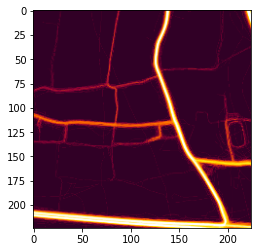

In [ ]:
im = cv2.imread(filename)
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

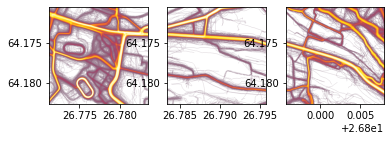

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(1,3,1)
ax2.imshow(mpimg.imread('18574-11136.png'), extent=(df.loc['18574-11136.png']['A'][0], df.loc['18574-11136.png']['C'][0], df.loc['18574-11136.png']['A'][1], df.loc['18574-11136.png']['C'][1],), zorder=1)
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(mpimg.imread('18575-11136.png'), extent=(df.loc['18575-11136.png']['A'][0], df.loc['18575-11136.png']['C'][0], df.loc['18575-11136.png']['A'][1], df.loc['18575-11136.png']['C'][1],), zorder=1)
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(mpimg.imread('18576-11136.png'), extent=(df.loc['18576-11136.png']['A'][0], df.loc['18576-11136.png']['C'][0], df.loc['18576-11136.png']['A'][1], df.loc['18576-11136.png']['C'][1],), zorder=1)


In [ ]:
pip install exifread

     |████████████████████████████████| 40kB 3.2MB/s 
